# Introduction


#### Life expectancy serves as a powerful reflection of a nation’s overall development, healthcare quality, and living conditions. This project focuses on exploring the factors that influence life expectancy across 193 countries over the period 2000 to 2015. The dataset—sourced from the World Health Organization (WHO) and the United Nations (UN)—combines health, economic, demographic, and social indicators to better understand the drivers behind longevity.

# Columns 
Country: Name of the country

Year: Year of observation

Status: Classification as Developed or Developing

Health-Related Factors
Life expectancy: Average expected lifespan of a newborn

Adult Mortality: Death rate of individuals aged 15–60 (per 1,000)

Infant deaths: Total deaths in early childhood

Alcohol: Alcohol consumption (liters per capita per year)

Hepatitis B, Polio, Diphtheria: Immunization coverage rates

under-five_deaths : Number of deaths under age 5 per year.

Measles: Number of reported measles cases

HIV/AIDS: Deaths due to HIV/AIDS (ages 0–4 per 1,000 live births)

BMI: Average Body Mass Index

Thinness 1-19: Prevalence of underweight children and teens in percent

Socio-Economic & Educational Factors

population : Total population of the country.

gdp : Gross Domestic Product per capita (in US dollars).

Percentage expenditure : Economy-focused: % of GDP spent on health (per capita basis).

Total expenditure : Budget-focused: % of government spending that goes to health.

Schooling: Average years of education

Income composition of resources: Index reflecting income-related development


#### Some data points were missing in the original dataset, and I used country-wise averages to fill them ,which may slightly affect results.

In [112]:
import pandas as pd
import numpy as np

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
import os

In [115]:
data = pd.read_csv("Life Expectancy Data.csv")

In [116]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [117]:
data.shape

(2938, 21)

In [118]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [119]:
#Clean column names:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.lower()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [121]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,0.948000,20.700000


In [122]:
#Checking total null values present
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [123]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data.groupby('country')[col].transform(lambda x: x.fillna(x.median()))


for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)


C:\Users\91970\AppData\Local\Temp\ipykernel_19304\95852636.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [124]:
#after filling values
data.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
dtype: int64

# Questions on numpy:

In [125]:
#top and bottom 5 countires
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


In [126]:
data.tail()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,0.434,9.8


In [127]:
#Average life expectancy for each country.
data.groupby('country')['life_expectancy'].mean()

country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zimbabwe                              50.48750
Name: life_expectancy, Length: 193, dtype: float64

In [128]:
#Country with the highest average GDP
high_gdp = max(data.groupby('country')['gdp'].mean())
print(high_gdp)
mean_col = data.groupby('country')['gdp'].mean()
mean_col[mean_col >= high_gdp]

57362.87460125


country
Switzerland    57362.874601
Name: gdp, dtype: float64

In [129]:
#Average life expectancy in India
data[data['country']=='India']['life_expectancy'].mean()

np.float64(65.41874999999999)

In [130]:
#Average alcohol consumption for developed vs developing countries
data.groupby('status')['alcohol'].mean()

status
Developed     9.86043
Developing    3.49615
Name: alcohol, dtype: float64

In [131]:
#Average BMI for the year 2010
data_2010 = data[data['year'] == 2010]
np.average(data_2010['bmi'])

np.float64(38.56830601092896)

# Questions on pandas

In [132]:
#Countries with highest average life expectancy
data.groupby('country')['life_expectancy'].mean().sort_values(ascending=False).head(5)

country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: life_expectancy, dtype: float64

In [133]:
#top 5 richest countires
data.groupby('country')['gdp'].mean().sort_values(ascending=False).head(5)

country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Name: gdp, dtype: float64

In [134]:
#Countries with lowest average life expectancy in the year 2000
low = data[data['year'] == 2000].groupby('country')['life_expectancy'].mean()
low.sort_values().head(5)

country
Sierra Leone    39.0
Malawi          43.1
Zambia          43.8
Angola          45.3
Eritrea         45.3
Name: life_expectancy, dtype: float64

In [135]:
#dropping Morroco
data = data.drop([1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763])

In [136]:
data[data['country']=='Morocco']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling


In [137]:
#Countires with population greater than 50 million and GDP greater than 500
data[(data['population'] > 50000000)&(data['gdp']>500)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
194,Bangladesh,2013,Developing,71.0,135.0,104,0.01,52.829865,96.0,237,...,130,96.0,2.88,96.0,0.1,951.889453,157571292.0,18.3,0.565,10.0
196,Bangladesh,2011,Developing,73.0,14.0,118,0.01,62.349885,96.0,5625,...,150,96.0,3.16,96.0,0.1,835.789341,153911916.0,18.7,0.545,9.4
200,Bangladesh,2007,Developing,68.6,151.0,154,0.01,46.365367,95.0,2924,...,201,96.0,2.80,94.0,0.1,541.651484,147139191.0,19.5,0.513,8.6
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,57,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,0.724,14.0
357,Brazil,2010,Developing,73.8,154.0,54,7.52,1111.191325,96.0,68,...,61,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,0.716,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,22,97.0,5.24,97.0,0.1,1172.384300,74569867.0,4.9,0.750,14.3
2686,Turkey,2010,Developing,74.2,116.0,21,1.49,32.782358,96.0,7,...,25,97.0,5.61,97.0,0.1,1672.569300,72326914.0,4.9,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.40,106.948290,94.0,4,...,27,96.0,6.80,96.0,0.1,936.499911,71339185.0,4.9,0.709,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.26,115.580110,96.0,3,...,31,96.0,6.40,96.0,0.1,979.492460,69597281.0,5.0,0.697,12.3


In [138]:
#Country that had the biggest increase in average GDP from 2000–2015.
gdp_2000 = data[data['year'] == 2000].groupby('country')['gdp'].mean()
gdp_2015 = data[data['year'] == 2015].groupby('country')['gdp'].mean()

gdp_change = gdp_2015 - gdp_2000
gdp_change.sort_values(ascending=False).head(1)


country
Australia    54384.4666
Name: gdp, dtype: float64

In [139]:
#Top 5 countries in 2015 with highest health expenditure
data[data['year'] == 2015].groupby('country')['total_expenditure'].mean().sort_values(ascending=False).head(5)

country
United States of America            15.60
Micronesia (Federated States of)    12.11
Sierra Leone                        11.69
France                               9.77
Portugal                             9.54
Name: total_expenditure, dtype: float64

In [140]:
#Highest average alcohol consumption among developing countries
data[data['status'] == 'Developing'].groupby('country')['alcohol'].mean().sort_values(ascending=False).head()

country
Belarus               13.525000
France                12.391875
Saint Lucia           11.532500
Russian Federation    11.123125
Bahamas               10.263750
Name: alcohol, dtype: float64

In [141]:
#Countries with over 90% hepatitis B immunization in 2015
data[(data['year'] == 2015) & (data['hepatitis_b'] > 90)]['country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Chile', 'China', 'Colombia', 'Comoros',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'Gambia',
       'Georgia', 'Greece', 'Grenada', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'Iran (Islamic Republic of)', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lesotho', 'Libya', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius',
       'Mongolia', 'Namibia', 'Nepal', 'Neth

In [142]:
#Number of countries with thinnes less than 10%
thin = data.groupby('country')['thinness__1-19_years'].mean()
len(thin[thin < 10])

177

# Questions on Matplotlib 

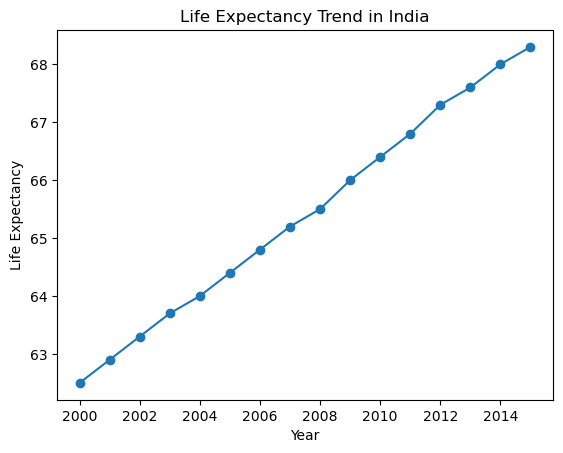

In [143]:
#Life expectancy trend in India
country_data = data[data['country'] == 'India']
plt.plot(country_data['year'], country_data['life_expectancy'], marker='o')
plt.title("Life Expectancy Trend in India")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()

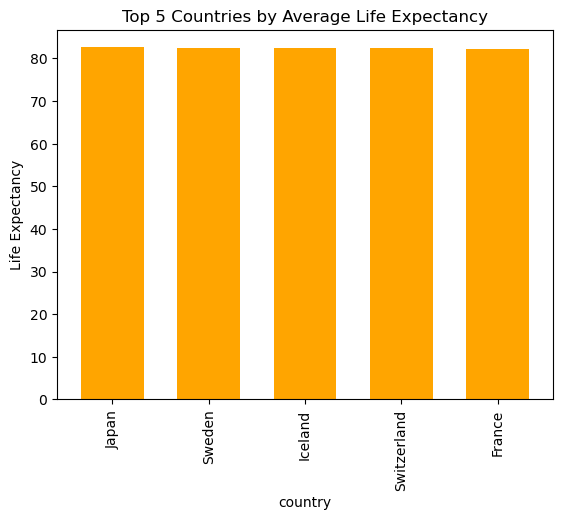

In [144]:
#Top 5 countries with highest average life expectancy
avg_life = data.groupby('country')['life_expectancy'].mean().sort_values(ascending=False).head(5)
avg_life.plot(kind='bar', color='orange',width=0.65)
plt.title("Top 5 Countries by Average Life Expectancy")
plt.ylabel("Life Expectancy")
plt.show()


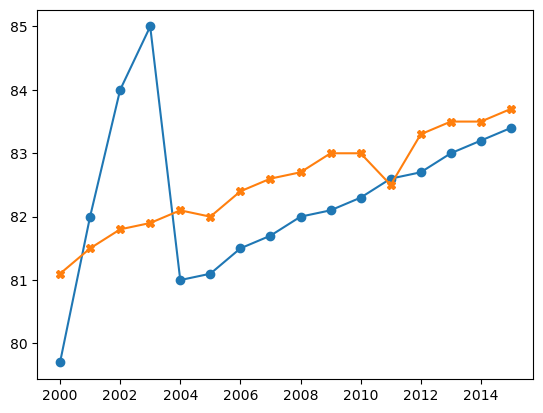

In [145]:
#Comparisopn of life expectancy between Switzerland and Japan
Switzer_data = data[data['country'] == 'Switzerland']
Japan_data = data[data['country']=='Japan']
plt.plot(Switzer_data['year'], Switzer_data['life_expectancy'], marker='o')
plt.plot(Japan_data['year'], Japan_data['life_expectancy'], marker='X')


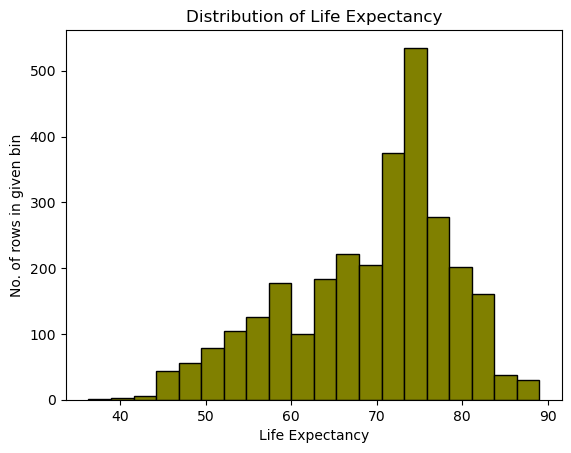

In [146]:
#Distribution of life expectancy values
plt.hist(data['life_expectancy'], bins=20, color='olive', edgecolor='black')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("No. of rows in given bin")
plt.show()



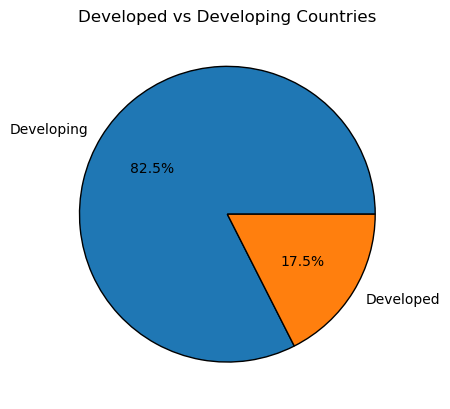

In [147]:
plt.pie(data['status'].value_counts(), labels=['Developing','Developed'],autopct='%1.1f%%',wedgeprops={"edgecolor":"black"})
plt.title("Developed vs Developing Countries")
plt.show()

# Questions on seaborn

C:\Users\91970\AppData\Local\Temp\ipykernel_19304\3834962233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='status', y='life_expectancy', palette='PuRd')


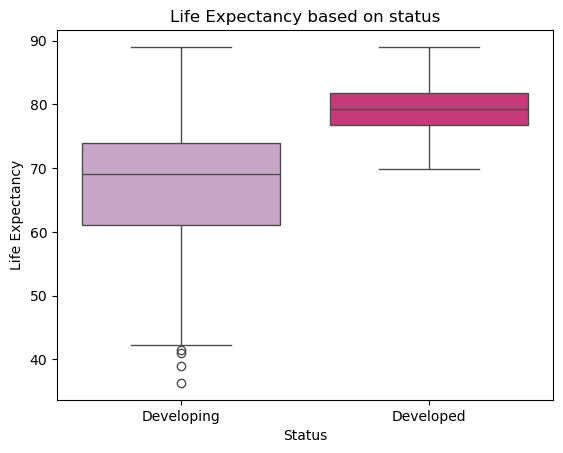

In [148]:
#Comparison of life expectencies between developed and developing countries using boxplot
sns.boxplot(data=data, x='status', y='life_expectancy', palette='PuRd')
plt.title("Life Expectancy based on status")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.show()


C:\Users\91970\AppData\Local\Temp\ipykernel_19304\3622077276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='status', y='polio', palette='CMRmap')


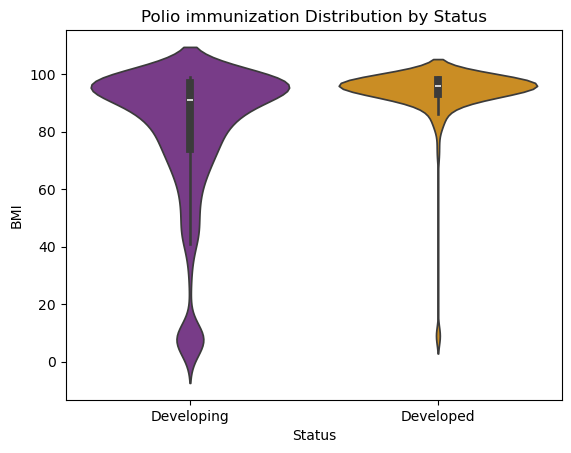

In [149]:
#Violin Plot of polio% by Status
sns.violinplot(data=data, x='status', y='polio', palette='CMRmap')
plt.title("Polio immunization Distribution by Status")
plt.xlabel("Status")
plt.ylabel("BMI")
plt.show()

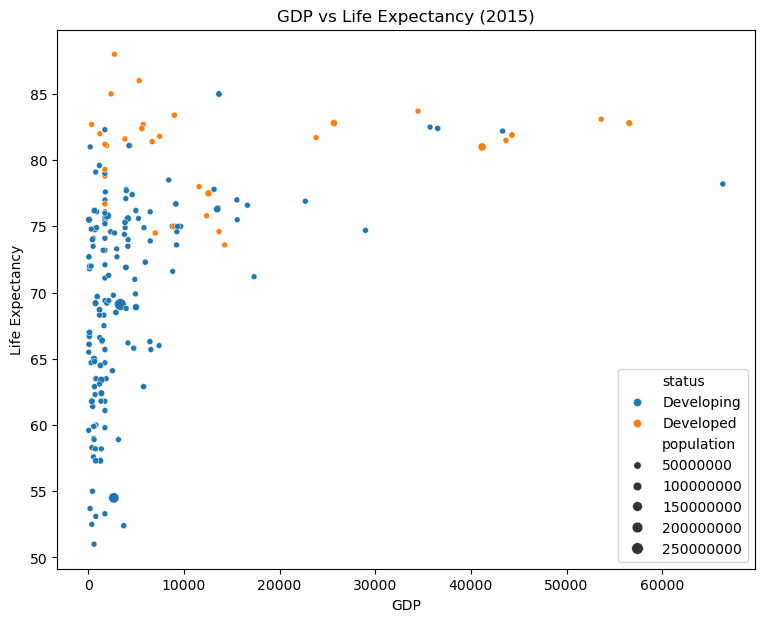

In [150]:
#Scatterplot of developed vs developing countires based on life expectancy
year_2015 = data[data['year'] == 2015]
plt.figure(figsize=(9,7))
sns.scatterplot(data=year_2015, x='gdp', y='life_expectancy', hue='status', size='population')
plt.title("GDP vs Life Expectancy (2015)")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.show()

C:\Users\91970\AppData\Local\Temp\ipykernel_19304\2247748796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.index, y=avg_income.values, palette='magma')


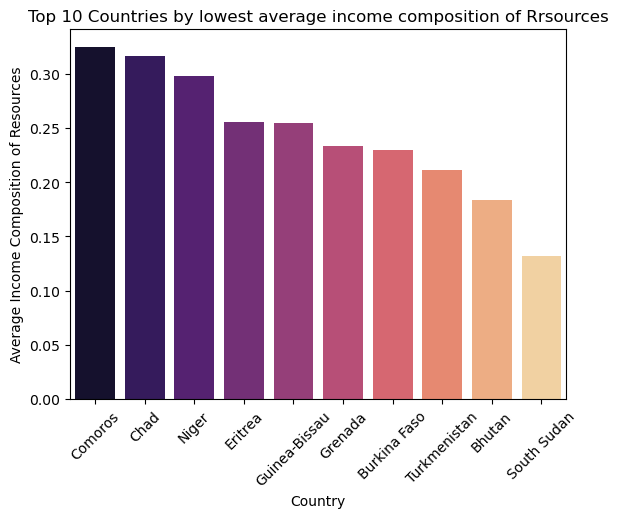

In [151]:
#Bar graph of countries with the lowest income composition of resources (fewer resources contributing effectively to income.)
avg_income = data.groupby('country')['income_composition_of_resources'].mean().sort_values(ascending=False).tail(10)
sns.barplot(x=avg_income.index, y=avg_income.values, palette='magma')
plt.title("Top 10 Countries by lowest average income composition of Rrsources")
plt.xlabel("Country")
plt.ylabel("Average Income Composition of Resources")
plt.xticks(rotation=45)
plt.show()

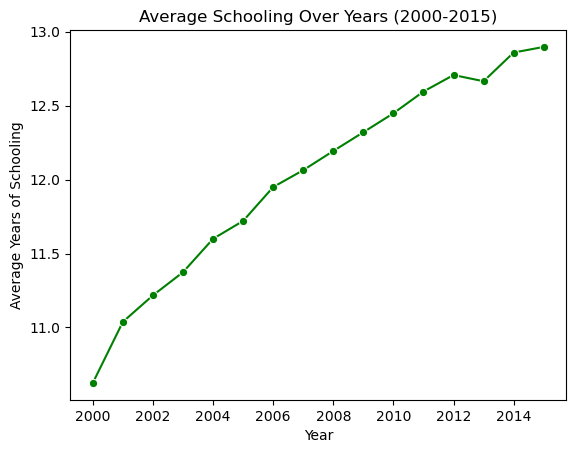

In [152]:
#line plot showing how average years of schooling are spread across countries over years:
avg_schooling_year = data.groupby('year')['schooling'].mean()
sns.lineplot(x=avg_schooling_year.index, y=avg_schooling_year.values, marker='o', color='green')
plt.title("Average Schooling Over Years (2000-2015)")
plt.xlabel("Year")
plt.ylabel("Average Years of Schooling")
plt.show()


C:\Users\91970\AppData\Local\Temp\ipykernel_19304\645294272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gdp.index, y=avg_gdp.values, palette='viridis')


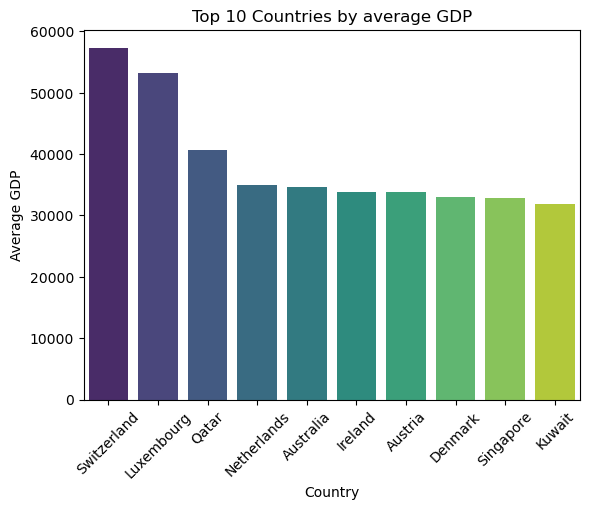

In [153]:
#Top 10 countires by average gdp
avg_gdp = data.groupby('country')['gdp'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_gdp.index, y=avg_gdp.values, palette='viridis')
plt.title("Top 10 Countries by average GDP")
plt.xlabel("Country")
plt.ylabel("Average GDP")
plt.xticks(rotation=45)
plt.show()

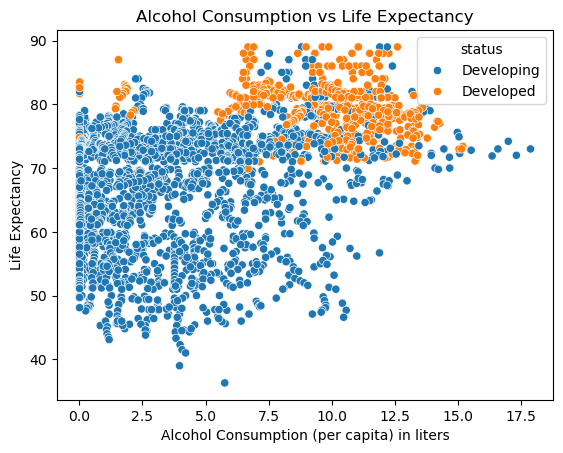

In [154]:
sns.scatterplot(data=data, x='alcohol', y='life_expectancy', hue='status')
plt.title("Alcohol Consumption vs Life Expectancy")
plt.xlabel("Alcohol Consumption (per capita) in liters")
plt.ylabel("Life Expectancy")
plt.show()

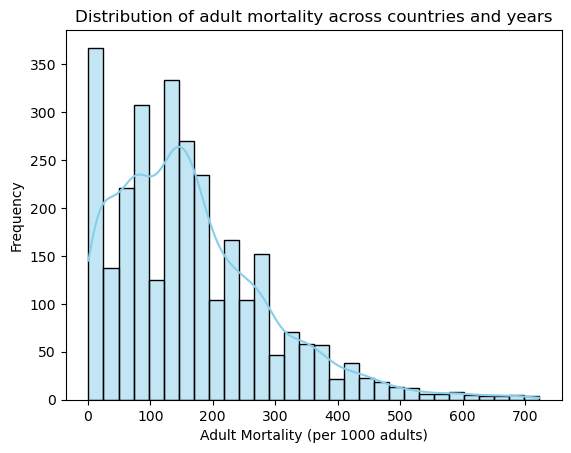

In [155]:
#Distribution of adult mortality across countries and years
sns.histplot(data['adult_mortality'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of adult mortality across countries and years")
plt.xlabel("Adult Mortality (per 1000 adults)")
plt.ylabel("Frequency")
plt.show()

# Conclusion

##### The first step before any form of analysis was performed was data cleaning. This included filling null values using average values of that country.After the number of null values were zero, analysis was done on the dataset

Numpy was used to perform basic filtering and sorting of data, along with Pandas wherein manipulation techniques were used to change column names, as well as dropping rows, and using groupby.

Finally, data was visualized with the help of Matplotlib and Seaborn, which allowed clear and deep understanding of data without looking at it directly.